In [56]:
pip install pandas==2.0.0 scikit-learn==1.3.2

Note: you may need to restart the kernel to use updated packages.


c:\Users\jxoxa\DataMiningLab\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe: No module named pip


In [57]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import plotly.express as px

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [58]:
import pandas as pd
X = pd.read_csv("初賽資料/初賽資料/acct_transaction.csv")
# 查看資料大小
print(X.shape)
# 查看前五項
X.head(5)

(4435890, 10)


,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
0,be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...,1,7abb16ac9bddc1f464981131ba68506775a964df2e0734...,1,N,47500.0,71,05:05:00,TWD,04
1,18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...,1,e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...,2,UNK,6150.0,31,20:55:00,TWD,03
2,302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...,1,4a707a0af2aa824777082803013610090033104c308023...,1,N,1150000.0,37,09:20:00,TWD,04
3,5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...,1,d16b1bf33802f020b508002755c13aad549bc59dde7aae...,2,UNK,8550.0,106,13:40:00,TWD,04
4,7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...,1,c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...,1,N,1450.0,84,11:20:00,TWD,03


In [59]:
import helpers.data_mining_helpers as dmh
# 查看有沒有重複的資料
print(sum(X.duplicated()))
# 查看有沒有遺失的資料
X.isnull().apply(lambda x: dmh.check_missing_values(x))

72355


,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0


In [60]:
X.drop_duplicates(keep=False, inplace=True)
print(sum(X.duplicated()))
len(X)

0


4294400

### 3. **處理異常值 (Outliers)**

* **`txn_amt`（交易金額）**：這是一個數值型欄位，可能會有極端值（例如非常大的交易金額或極小的金額），這些異常值可能會對模型訓練造成影響。你可以根據箱型圖（Boxplot）或Z分數來識別異常值。如果發現有極端的金額，可以根據業務邏輯進行處理，例如：

  * 去除極端值（比如交易金額超過某個合理範圍）。
  * 或者將異常值限制在一定範圍內，這樣能夠保留有效的數據。

### 4. **特徵縮放 (Feature Scaling)**

* **`txn_amt`（交易金額）** 和 **`txn_time`（交易時間）**：這些數值型欄位應進行縮放，因為不同數據的範圍可能差異較大，會對某些機器學習算法（如KNN、SVM、神經網絡等）造成影響。

  * **`txn_amt`**：可以使用 **標準化（Standardization）** 或 **歸一化（Normalization）** 來處理。
  * **`txn_time`**：如果數據的範圍很大，可以使用 **標準化** 來處理，或者如果這個欄位是表示具體時間點，也可以根據需求進行適當處理（例如按日、月來劃分）。

### 5. **類別特徵處理 (Categorical Data Encoding)**

你的資料中有多個類別型欄位，如 `from_acct`、`from_acct_type`、`to_acct_type` 等。這些類別型特徵需要轉換成數值型數據，才能被機器學習算法使用。以下是常見的處理方法：

* **`from_acct` 和 `to_acct`（匯款帳戶與收款帳戶）**：可以使用 **標籤編碼（Label Encoding）**，將每個帳戶類型映射為數字（例如，1表示某一帳戶，2表示另一帳戶）。不過，這些類別如果有順序性，標籤編碼是合適的。如果沒有順序性，可以使用 **獨熱編碼（One-Hot Encoding）**。
* **`from_acct_type` 和 `to_acct_type`（帳戶是否為玉山帳戶）**：可以直接使用 **標籤編碼**，將`01`轉換為1，`02`轉換為0，這樣處理後可以作為數值特徵使用。
* **`is_self_txn`（交易雙方是否為同一人）**：這是一個二分類欄位，使用 **標籤編碼（Label Encoding）** 將 "Y" 轉換為 1，"N" 轉換為 0，"UNK" 可以轉換為 -1 或直接刪除。

### 6. **特徵工程 (Feature Engineering)**

* **`txn_date`（交易日期）**：這是日期型欄位，可以提取出更多特徵，例如：

  * **年、月、日**：根據需要提取交易的年份、月份和日期。
  * **工作日/週末**：根據日期判斷該交易是否發生在工作日或週末，這對分析可能有價值。
  * **季度**：提取季度特徵（如Q1, Q2等）可能有助於發現某些周期性的模式。
  * **是否假日**：如果有假日信息，可以判斷該交易是否發生在假日。
* **`txn_time`（交易時間）**：如果時間包含的是小時和分鐘，可以提取出是否是早上/下午、是否高峰時間（例如早高峰、晚高峰）等信息。

### 7. **資料格式轉換 (Data Type Conversion)**

* **`txn_date`（交易日期）**：這是一個類別型欄位，應該轉換為日期型數據（如 `datetime` 格式），以便進行時間序列分析或提取更多日期特徵。
* **`txn_time`（交易時間）**：如果這是以數值型呈現（如秒數或分鐘數），你可以考慮將其轉換為時間型數據，或根據需要進行處理（例如，轉換為小時/分鐘等形式）。

### 8. **處理不平衡的數據 (Handling Imbalanced Data)**

* 假如你的目標變量（未顯示的）存在類別不平衡的情況，例如有些類別出現的次數比其他類別多很多，可以使用以下方法：

  * **過採樣（Over-sampling）**：對少數類別進行過採樣，例如使用 SMOTE（合成少數類樣本技術）來生成更多的少數類樣本。
  * **欠採樣（Under-sampling）**：減少多數類別的樣本數。
  * **類別加權**：在模型中為少數類別設置更高的權重，使其在訓練過程中更加受到重視。

### 9. **數據拆分 (Data Splitting)**

* **訓練集與測試集拆分**：將資料集劃分為訓練集和測試集，一般比例是 70% 訓練集，30% 測試集，或者 80% 訓練集，20% 測試集。
* **交叉驗證**：在模型訓練時，使用 **K-fold交叉驗證** 來避免過擬合並提高模型的穩健性。這樣你可以用不同的資料子集訓練和驗證模型，提高模型泛化能力。

### 10. **數據增強 (Data Augmentation)**

* **對於數值型資料**：通常數值型資料（如交易金額和交易時間）並不需要增強處理，除非是用於特殊的時間序列模型或者在數據量不足時。
* **對於類別型資料**：如果有大量的類別型資料並且數據量較少，增強方法可能不常見。可以通過結合不同的類別特徵來生成新的特徵（如 `from_acct` 和 `to_acct` 的組合）來進行增強。


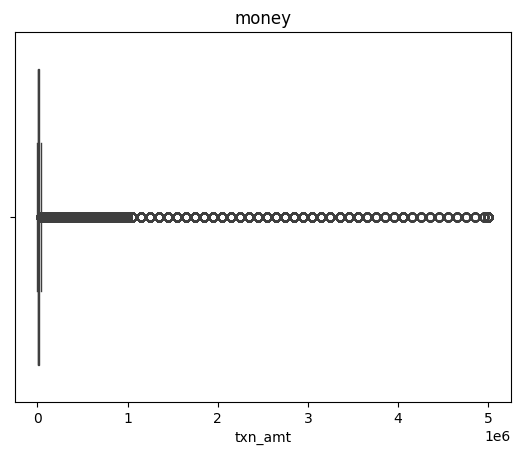

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=X['txn_amt'])
plt.title('money')
plt.show()

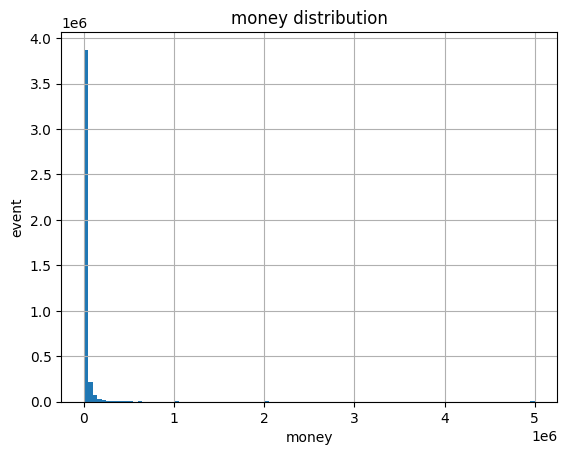

In [62]:
X['txn_amt'].hist(bins=100)
plt.title('money distribution')
plt.xlabel('money')
plt.ylabel('event')
plt.show()

In [63]:
Y = pd.read_csv("初賽資料/初賽資料/acct_alert.csv")
# 篩選 from_acct 在警示帳戶清單中的交易
alert_from = X[X['from_acct'].isin(Y['acct'])]
alert_to = X[X['to_acct'].isin(Y['acct'])]

print(len(alert_from))
print(len(alert_to))

alert_from[:5]

12552
20365


,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
719,73e878a90a6cf282ec5d8ec5f46f848c281db25a85666e...,1,ec184bc0202335de44e78d1ed4f7c9052ade66fcd79b9b...,1,N,30500.0,33,13:00:00,TWD,03
788,070418cdd5c742f7b1ee369f956bc57022e588b4123f7a...,1,12f2143d1684da5bd8c1547dc20a453750cae71696a4a2...,2,UNK,235.0,55,02:15:00,TWD,03
949,b93c3ab8bcf54c59dda4241e85764a835fd61237ed03c5...,1,e77ba59964f98c33f252346b6eee683fce59479475553e...,2,UNK,1050.0,48,06:15:00,TWD,03
1317,d4681448752ef972fc128ec888f459d46121f768bbc6b0...,1,f6adc32d4f60a22fb0d7bd1efbb704d4dc11ade01951a9...,1,N,19500.0,52,22:20:00,TWD,UNK
1859,d080817d6fb8868a478e0a83e45b82f70ab113135f9cb1...,1,d47df8de5770d392d6a5b4acf9c28051d5e2ed4489e8e0...,2,UNK,4050.0,15,13:40:00,TWD,03


In [ ]:
# 用 merge 保留 to_acct 是警示帳戶的交易
alert_to = pd.merge(
    X, Y[['acct', 'event_date']],
    left_on='to_acct', right_on='acct',
    how='inner'
)

# 計算交易日與警示日的差值
alert_to = alert_to[
    (alert_to['txn_date'] <= alert_to['event_date']) &
    (alert_to['txn_date'] >= alert_to['event_date'] - 5)  # 警示日五天內的交易資料
]

# 清理欄位
alert_to.drop(columns=['acct', 'event_date'], inplace=True)

In [65]:
alert_to[:3]

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_amt,txn_date,txn_time,currency_type,channel_type
0,a7573bce77b2a7b1a5f9c85b9f33264ef64d65cf5cd166...,2,588673d514f6ed0c358e3c12c9a2ce886fe33852bc75ac...,1,UNK,185.0,112,13:00:00,TWD,UNK
2,b5d4f29247f8681f4e1d4c7048eff5c1a6ce9ed8402618...,2,f9ae08b23cd655099e089afbb8846d0b4c52ee341d3128...,1,UNK,145000.0,108,16:05:00,TWD,UNK
6,0ee1a2162737223d63fbe92ca7d39c49b428ed866f7380...,2,26d6aac1d64a44272f6e9188a50f0e00bf22bc70a2e31e...,1,UNK,965.0,55,03:15:00,TWD,UNK


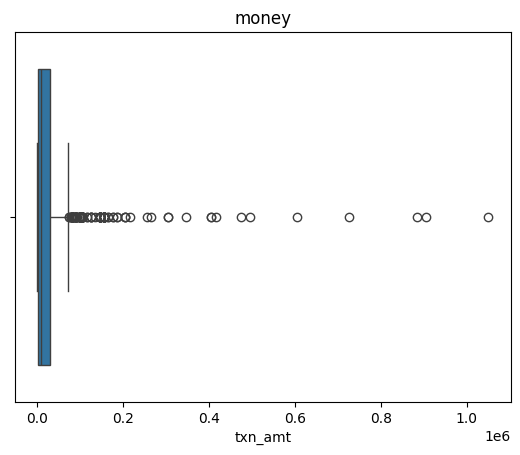

In [66]:
sns.boxplot(x=alert_to['txn_amt'])
plt.title('money')
plt.show()

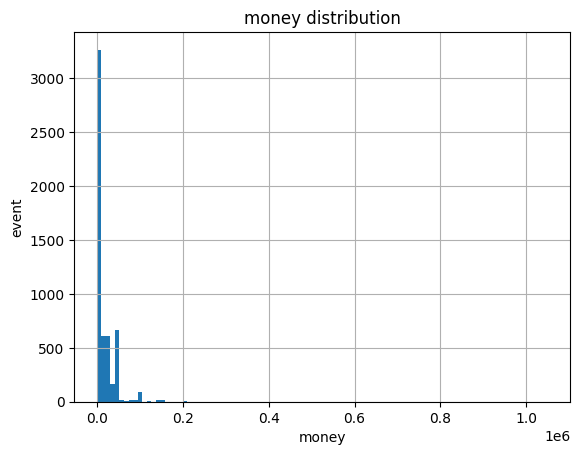

In [67]:
alert_to['txn_amt'].hist(bins=100)
plt.title('money distribution')
plt.xlabel('money')
plt.ylabel('event')
plt.show()

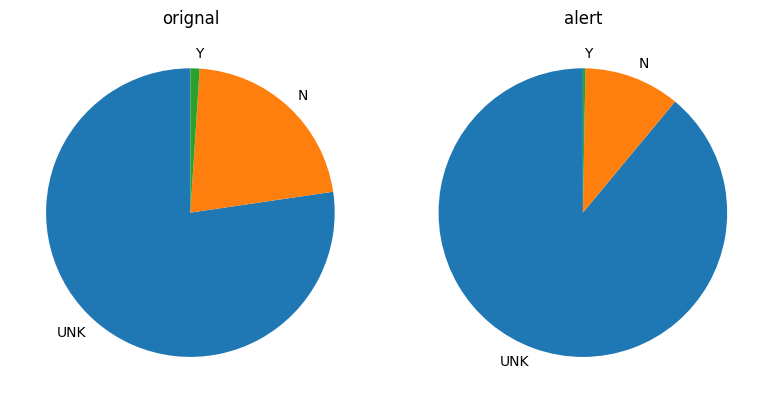

In [ ]:
import matplotlib.pyplot as plt

# 建立畫布與子圖
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # 1 列 2 欄，總寬 12 高 6

# 第一個圓餅圖：是否為本人交易
X['is_self_txn'].value_counts().plot(
    kind='pie',
    startangle=90,
    ax=axes[0],
    title='orignal'
)
axes[0].set_ylabel('')

alert_to['is_self_txn'].value_counts().plot(
    kind='pie',
    startangle=90,
    ax=axes[1],
    title='alert'
)
axes[1].set_ylabel('')

# 顯示圖表
plt.tight_layout()
plt.show()

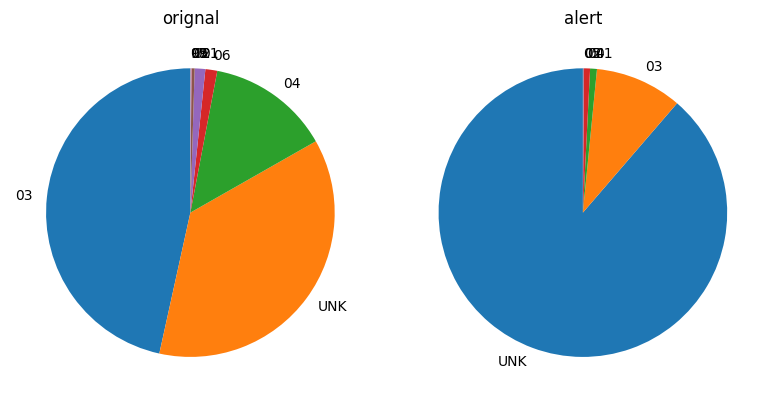

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

X['channel_type'].value_counts().plot(
    kind='pie',
    startangle=90,
    ax=axes[0],
    title='orignal'
)
axes[0].set_ylabel('')

alert_to['channel_type'].value_counts().plot(
    kind='pie',
    startangle=90,
    ax=axes[1],
    title='alert'
)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()